<a href="https://colab.research.google.com/github/ks-yahagi/EU_M_Math-Repository/blob/main/Chap09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mp1
import seaborn as sns
%matplotlib inline

#機械学習ライブラリ
import sklearn

#小数点第3位まで表示
%precision 3

'%.3f'

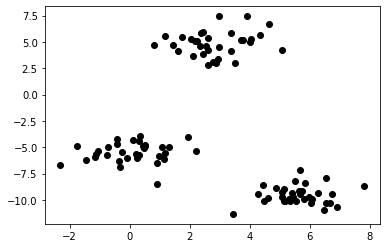

In [2]:
#訓練データの作成

#k-means法を扱うためのインポート
from sklearn.cluster import KMeans

#データ取得のためのインポート
from sklearn.datasets import make_blobs

#サンプルデータ生成
#注意:make_blobsは2つの値を返すため、一方は使用しない「_」で受け取る
X, _ =make_blobs(random_state=10)

#グラフを描画
#colorのオプションで色付けが出来る
plt.scatter(X[:,0],X[:,1],color='black')

In [3]:
#KMeansクラスの初期化
kmeans = KMeans(init='random',n_clusters=3)

#クラスターの重心を計算
kmeans.fit(X)

#クラスター番号を予測
y_pred = kmeans.predict(X)

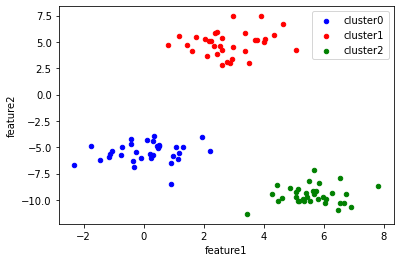

In [4]:
#concatでデータを横に移動
merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pred)], axis=1)

#上記のデータにて、X軸をfeature1、Y軸をfeature2、クラスター番号をclusterと列名指定
merge_data.columns = ['feature1','feature2','cluster']

#クラスタリング結果のグラフ化
ax = None
colors = ['blue','red','green']
for i, data in merge_data.groupby('cluster'):
  ax = data.plot.scatter(x='feature1',y='feature2',color=colors[i],label=f'cluster{i}',ax = ax)

In [5]:
#webからデータを取得したり、zipファイルを扱うためのライブラリをインポート
import requests,zipfile
import io

#データがあるurlの指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

#データを取得して展開する
r = requests.get(zip_file_url,stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#対象データの読み込み
bank = pd.read_csv('bank-full.csv',sep=';')

#先頭の5行を表示
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
print('データ形式(X,y):{}'.format(bank.shape))
print('欠損データの数:{}'.format(bank.isnull().sum().sum()))

データ形式(X,y):(45211, 17)
欠損データの数:0


In [7]:
from sklearn.preprocessing import StandardScaler

#データ配列の絞り込み
bank_sub = bank[['age','balance','campaign','previous']]

#標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


4    14734
0    24509
2     2684
1      221
5     1683
3     1380
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

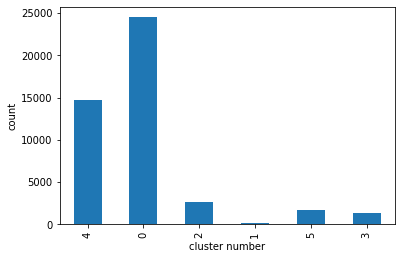

In [10]:
#KMeansクラスの初期化
kmeans = KMeans(init='random',n_clusters=6,random_state=0)

#クラスターの重心を計算
kmeans.fit(bank_sub_std)

#クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_,name='cluster_number')

#クラスター番号と件数を表示
print(labels.value_counts(sort=False))

#グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')